# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification with Multi-layer Perceptrons

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

In [ ]:
# !pip install Pillow

In [ ]:
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
from math import sqrt
import nnFunctions
import importlib
%matplotlib inline
import random

np.random.seed(10**3)

In [ ]:
# run this cell if you modified the nnFunctions.py file and you wish to reload the module

importlib.reload(nnFunctions)

<module 'nnFunctions' from '/content/nnFunctions.py'>

In [ ]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [ ]:
# load data
train_data,train_label,test_data,test_label = pickle.load(open('AI_quick_draw_sm.pickle','rb'))

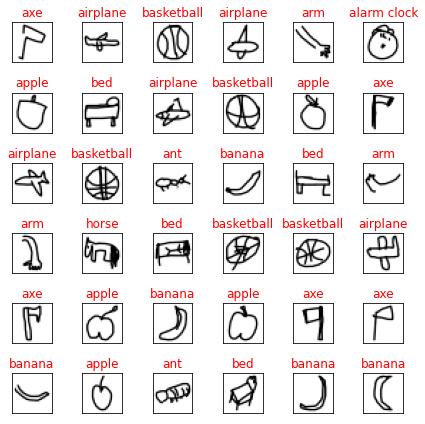

In [ ]:
# visualize some images
fig = plt.figure(figsize=[6,6])
for i in range(36):
    ax = plt.subplot(6,6,i+1)    
    ind = np.random.randint(0,train_data.shape[0])
    plt.imshow(train_data[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(train_label[ind])])
plt.tight_layout()

In [ ]:
#  Train Neural Network
# set the number of nodes in input unit (not including bias unit)
n_input = train_data.shape[1]

# set the number of nodes in hidden unit or M (not including bias unit)
n_hidden = 100 # you can modify this parameter

# set the number of nodes in output unit
n_class = len(np.unique(train_label)) # this parameter is fixed

# initialize the weights into some random matrices
initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)

# unroll 2 weight matrices into single column vector
initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)

# set the regularization hyper-parameter
lambdaval = 20 # you can modify this parameter

args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

# Train Neural Network using fmin_cg or minimize from scipy,optimize module. 
# Check documentation for a working example
opts = {'maxiter': 50}  # Preferred value.
st = time.time()
nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
en = time.time()
# Reshape nnParams from 1D vector into W1 and W2 matrices
W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
print("Training completed in {:.2f} seconds.".format(en-st))

# Test the computed parameters

# find the accuracy on Training Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
print('Training set Accuracy: {:.2f}%'.format(100 * np.mean((predicted_label == train_label.astype(float)))))

# find the accuracy on Testing Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
print('Test set Accuracy    : {:.2f}%'.format(100 * np.mean((predicted_label == test_label.astype(float)))))

/content/nnFunctions.py:35: RuntimeWarning: overflow encountered in exp
  return sig


Training completed in 21.31 seconds.
Training set Accuracy: 71.65%
Test set Accuracy    : 67.70%


/content/nnFunctions.py:35: RuntimeWarning: overflow encountered in exp
  return sig


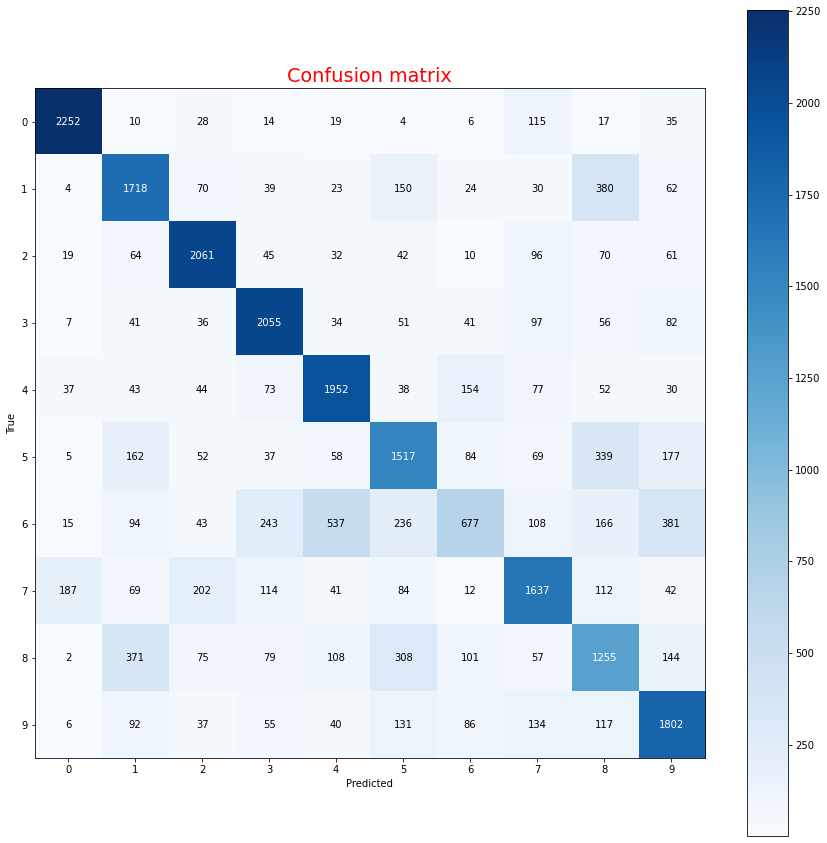

In [ ]:
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt1
from scipy.optimize import minimize
import time
from math import sqrt
import nnFunctions
import importlib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

# visualize prediction on a random image
rnd_ind = np.random.randint(test_label.shape[0])
predictions=[]
testlabels=[]
 
for i in range(test_label.shape[0]):
    pred=nnFunctions.nnPredict(W1,W2,test_data[i:i+1,:])
    predictions.append(pred[0])
    testlabels.append(test_label[i])
testd=[i for i in testlabels]
from matplotlib import pyplot as plt
 
tick_marks = [int(i) for  i in  range(0,n_class,1)]
# print(tick_marks)
cm=confusion_matrix(testd, predictions, tick_marks)

# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.array(range(n_class)))                         
# fig, ax = plt.subplots(figsize=(15,15))
# cm_display.plot(ax=ax)
np.set_printoptions(precision=1)
 
plt.figure(figsize = (12,12))
 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
 


# class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']  


 
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if  cm[i, j] == 0 or cm[i, j] > thresh else "black") 
plt.tight_layout()
plt.colorbar()
# plt.ylim([0, 9])
plt1.rcParams.update({'font.size': 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
tick_marks = np.arange(len(tick_marks))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.show()

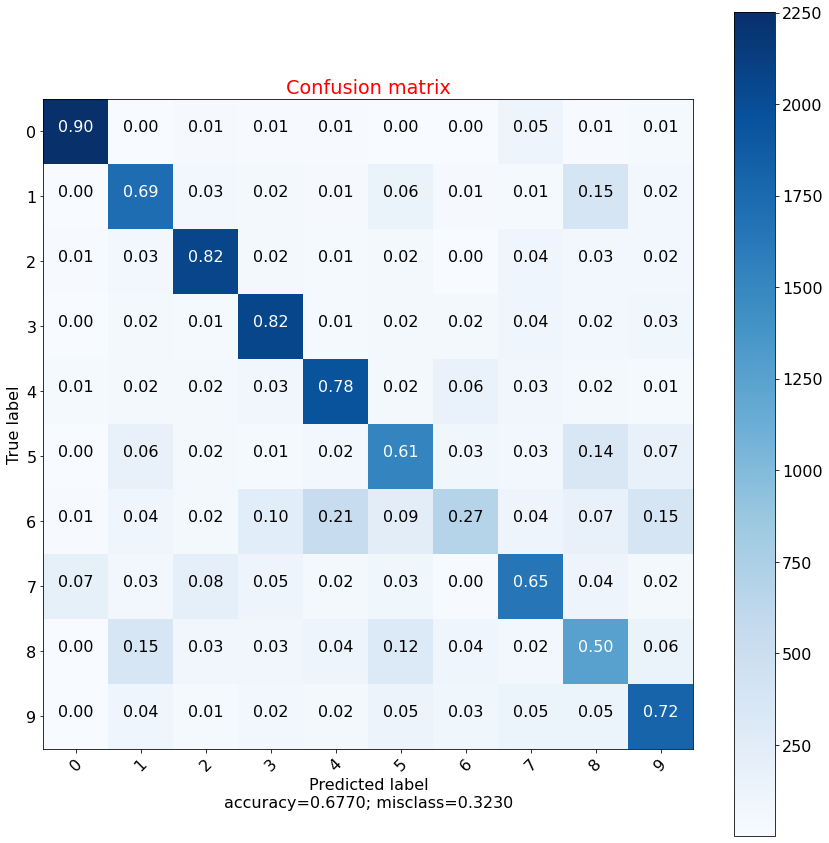

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  import matplotlib.pyplot as plt
  import numpy as np
  import itertools

  accuracy = np.trace(cm) / np.sum(cm).astype('float')
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(12, 12))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
      tick_marks = np.arange(len(target_names))
      plt.xticks(tick_marks, target_names, rotation=45)
      plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] ==0 or cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] ==0 or cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt2.rcParams.update({'font.size': 16})
  plt.show()
  
plot_confusion_matrix(cm, tick_marks, title='Confusion matrix', cmap=None, normalize=True)

/content/nnFunctions.py:35: RuntimeWarning: overflow encountered in exp
  return sig


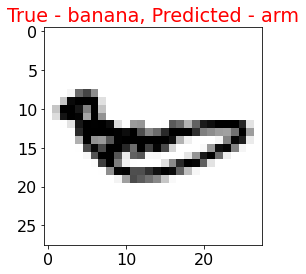

In [ ]:
# # visualize prediction on a random image
# rnd_ind = np.random.randint(test_label.shape[0])
# predicted_label = nnFunctions.nnPredict(W1,W2,test_data[rnd_ind:rnd_ind+1,:])
# if predicted_label[0] == test_label[rnd_ind]:
#     params = {"text.color" : "green"}
# else:
#     params = {"text.color" : "red"}
# plt.rcParams.update(params)

# plt.imshow(test_data[rnd_ind,:].reshape((28,28)),cmap='Greys')
# t = plt.title('True - {}, Predicted - {}'.format(classes[int(test_label[rnd_ind])],classes[int(predicted_label[0])]))